
##  **Most Important Techniques for Regression **

### 🔹 **1. Correlation Analysis (Pearson)**
- **Why**: To detect **linear relationships** between independent variables and the target.
- **Use it to**: Remove irrelevant or redundant features early.

### 🔹 **2. Skewness**
- **Why**: Many regression models (especially linear ones) assume normally distributed features.
- **Use it to**: Apply **log/sqrt** transformations on skewed features.
- **Tool**: `df.skew()` in Pandas.

### 🔹 **3. P-Value (from Linear Regression Summary)**
- **Why**: Shows if a feature is **statistically significant**.
- **Use it to**: Drop features with **p > 0.05** in **OLS regression** (e.g., using `statsmodels`).

### 🔹 **4. Variance Inflation Factor (VIF)**
- **Why**: Detects **multicollinearity** (when features are too correlated with each other).
- **Use it to**: Drop or combine highly collinear features.
- **Threshold**: VIF > 5 or 10 is usually problematic.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
file = pd.read_csv("/content/drive/MyDrive/task/housepricePrediction/housing.csv")

In [ ]:
file.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
file.shape

(20640, 10)

In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
file.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


#### fillna

In [6]:
file["total_bedrooms"] = file["total_bedrooms"].fillna(file["total_bedrooms"].mean())

In [7]:
file.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


### duplicate

In [8]:
file.duplicated().sum()

np.int64(0)

In [9]:
file.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


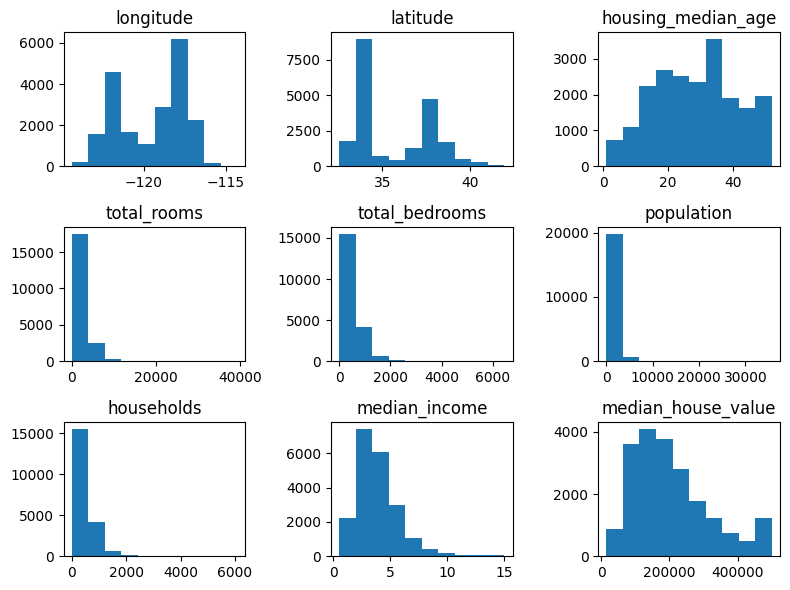

In [10]:
file.hist(bins=10, figsize=(8, 6), grid=False)
plt.tight_layout()
plt.show()

In [11]:
df_numeric = file.select_dtypes(include='number')
df_numeric.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


<Axes: >

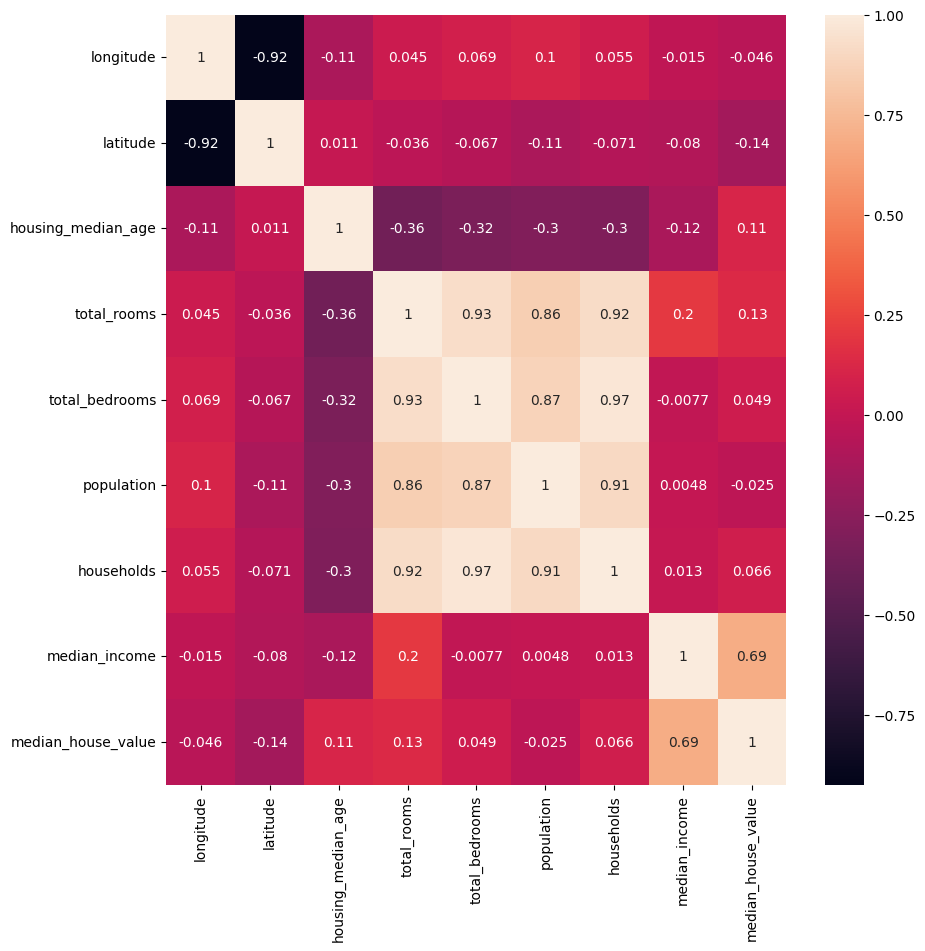

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df_numeric.corr(), annot = True)


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
file["ocean_proximity_encoder"] = encoder.fit_transform(file["ocean_proximity"])

In [14]:
file.drop(["ocean_proximity"], axis = 1).skew()

,0
longitude,-0.297801
latitude,0.465953
housing_median_age,0.060331
total_rooms,4.147343
total_bedrooms,3.477023
population,4.935858
households,3.410438
median_income,1.646657
median_house_value,0.977763
ocean_proximity_encoder,1.016286


In [15]:

for col in ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']:
    file[col] = np.log1p(file[col])

In [16]:
file.drop(["ocean_proximity"], axis = 1).skew()


,0
longitude,-0.297801
latitude,0.465953
housing_median_age,0.060331
total_rooms,-1.075533
total_bedrooms,-1.005686
population,-1.044087
households,-1.051607
median_income,0.226083
median_house_value,0.977763
ocean_proximity_encoder,1.016286


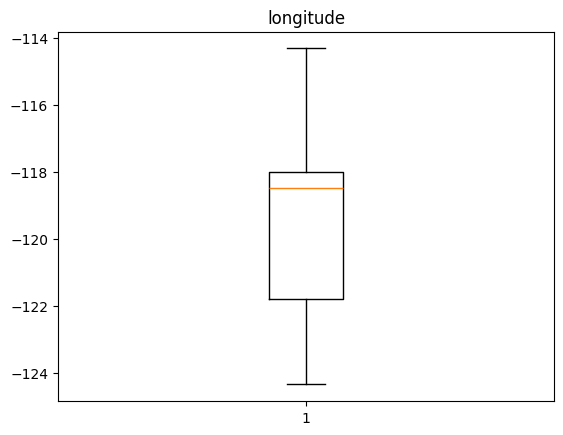

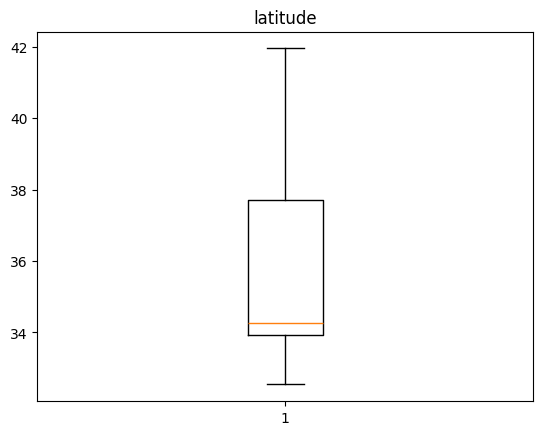

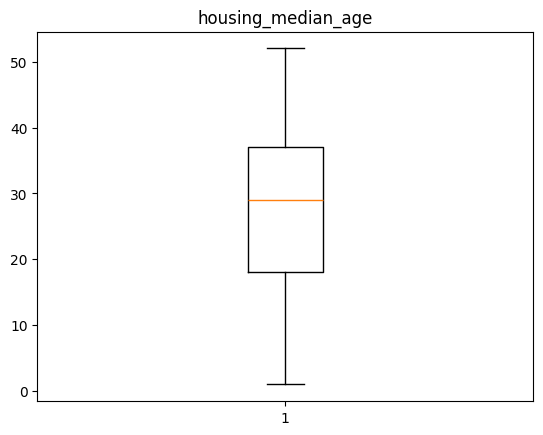

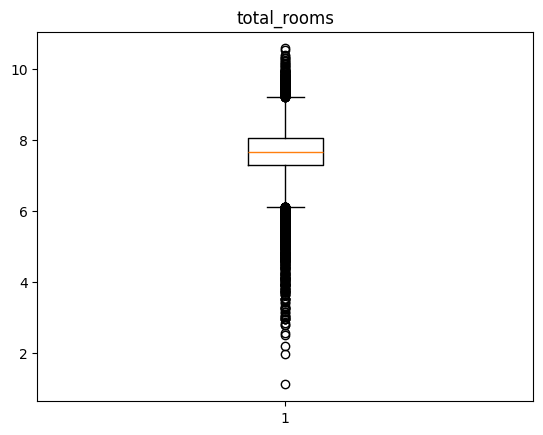

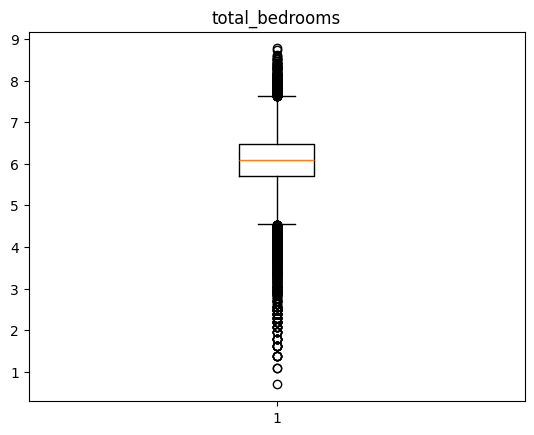

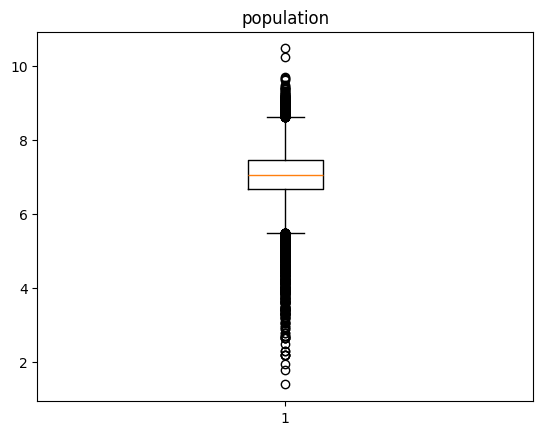

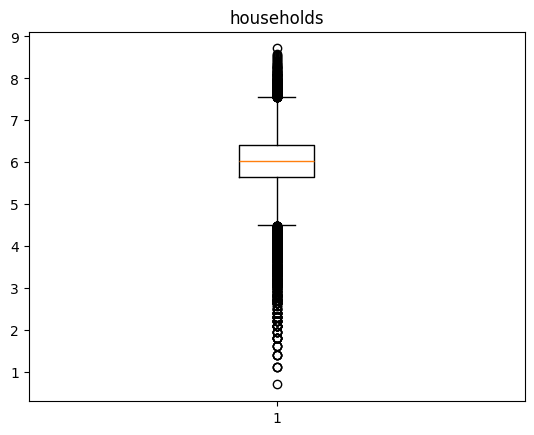

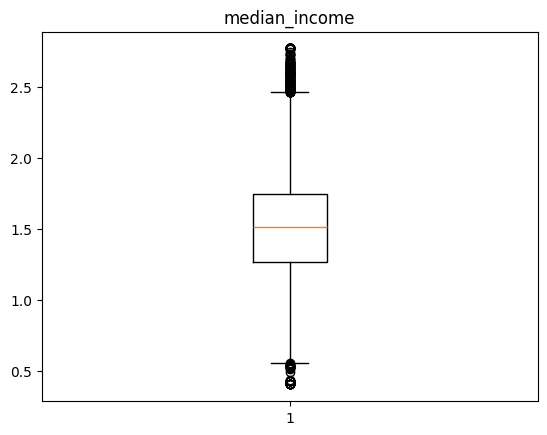

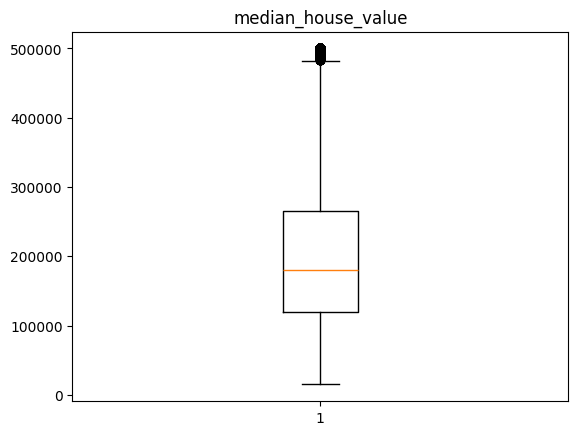

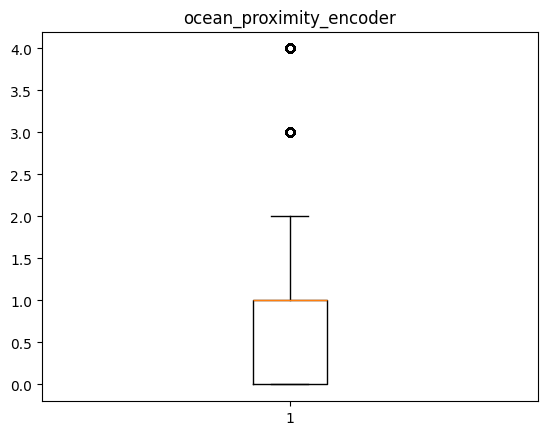

In [17]:
for x in file.drop(["ocean_proximity"], axis = 1).columns:
  plt.boxplot(file[x])
  plt.title(x)
  plt.show()


In [18]:
file.drop(["ocean_proximity"], axis = 1, inplace =True)

In [19]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

# Example for one column
outliers_population = detect_outliers_iqr(file, 'population')
print(f"Outliers in population: {len(outliers_population)} rows")


Outliers in population: 848 rows


In [21]:
df_clean = file[~file.index.isin(outliers_population.index)]
print(f"Data after removal: {df_clean.shape}")


Data after removal: (19792, 10)


## -- A low p-value (typically < 0.05) indicates the feature is statistically significant — it contributes meaningfully to predicting the target.

## -- A high p-value (> 0.05) suggests the feature might not have a strong relationship with the target and can often be dropped to simplify the model.

In [22]:
import statsmodels.api as sm
import pandas as pd

X = file.drop('median_house_value', axis=1)
y = file['median_house_value']

X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Get p-values
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     3891.
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        18:29:43   Log-Likelihood:            -2.5963e+05
No. Observations:               20640   AIC:                         5.193e+05
Df Residuals:                   20630   BIC:                         5.194e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3

## Variance Inflation Factor (VIF)


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np


X = sm.add_constant(X)

# 3. Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 4. Display VIF values
print(vif_data)


                   Feature           VIF
0                    const  20263.611082
1                longitude     10.457768
2                 latitude     10.610133
3       housing_median_age      1.232923
4              total_rooms     22.418730
5           total_bedrooms     28.172002
6               population      8.294694
7               households     29.389814
8            median_income      2.616423
9  ocean_proximity_encoder      1.174947


### Our result of VIF is above. Some columns have more then 10. its a serious multicolinality issue, so need to Drop or Combine Highly Correlated Features

  VIF Value	Interpretation

*  1	No multicollinearity

*  1–5	Moderate correlation (usually OK)

*  " >5	Potential multicollinearity problem"

*  "> 10	Serious multicollinearity issue"

In [24]:
df_clean['rooms_per_household'] = df_clean['total_rooms'] / df_clean['households']
df_clean['bedrooms_per_room'] = df_clean['total_bedrooms'] / df_clean['total_rooms']
df_clean = df_clean.drop(columns=['total_rooms', 'total_bedrooms', 'households'])


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# 1. Select only independent variables (exclude target)
X = df_clean.drop('median_house_value', axis=1)
y = df_clean['median_house_value']

# 2. Add constant column for intercept (required by statsmodels)
X = sm.add_constant(X)

# 3. Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 4. Display VIF values
print(vif_data)


                   Feature           VIF
0                    const  30383.255012
1                longitude     10.427349
2                 latitude     10.392971
3       housing_median_age      1.257010
4               population      1.903289
5            median_income      2.254784
6  ocean_proximity_encoder      1.148790
7      rooms_per_household      3.573142
8        bedrooms_per_room      3.278251


In [26]:
df_clean.head()

,longitude,latitude,housing_median_age,population,median_income,median_house_value,ocean_proximity_encoder,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,5.777652,2.232720,452600.0,3,1.399834,0.717813
1,-122.22,37.86,21.0,7.784057,2.230165,358500.0,3,1.260013,0.790429
2,-122.24,37.85,52.0,6.208590,2.111110,352100.0,3,1.407171,0.720313
3,-122.25,37.85,52.0,6.326149,1.893579,341300.0,3,1.325768,0.764097
4,-122.25,37.85,52.0,6.338594,1.578195,342200.0,3,1.329892,0.762444


In [27]:
df_clean.corr()

,longitude,latitude,housing_median_age,population,median_income,median_house_value,ocean_proximity_encoder,rooms_per_household,bedrooms_per_room
longitude,1.000000,-0.926373,-0.103345,0.115647,-0.015436,-0.047026,-0.291435,-0.079174,0.098203
latitude,-0.926373,1.000000,0.007069,-0.132026,-0.084714,-0.142887,0.203809,0.147896,-0.111391
housing_median_age,-0.103345,0.007069,1.000000,-0.278796,-0.134535,0.114507,0.113112,-0.048505,-0.011900
population,0.115647,-0.132026,-0.278796,1.000000,-0.008025,-0.040272,-0.086430,-0.542817,0.448892
median_income,-0.015436,-0.084714,-0.134535,-0.008025,1.000000,0.678967,-0.021576,0.475722,-0.583356
median_house_value,-0.047026,-0.142887,0.114507,-0.040272,0.678967,1.000000,0.080014,0.170919,-0.224200
ocean_proximity_encoder,-0.291435,0.203809,0.113112,-0.086430,-0.021576,0.080014,1.000000,0.006206,0.009577
rooms_per_household,-0.079174,0.147896,-0.048505,-0.542817,0.475722,0.170919,0.006206,1.000000,-0.788617
bedrooms_per_room,0.098203,-0.111391,-0.011900,0.448892,-0.583356,-0.224200,0.009577,-0.788617,1.000000


In [28]:
from sklearn.model_selection import train_test_split
# 1. Select only independent variables (exclude target)
X = file.drop('median_house_value', axis=1)
y = file['median_house_value']

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.2, random_state= 42)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare data
X = df_clean.drop(columns=['median_house_value'])  # Independent variables
y = df_clean['median_house_value']                 # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# -----------------------------
# ✅ Model 1: Random Forest
# -----------------------------
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# -----------------------------
# ✅ Model 2: XGBoost
# -----------------------------
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# -----------------------------
# ✅ Evaluation Function
# -----------------------------
def evaluate(y_true, y_pred, model_name):
    print(f"\n🔍 {model_name} Evaluation:")
    print(f"MAE:  {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE:  {mean_squared_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²:   {r2_score(y_true, y_pred):.4f}")

# -----------------------------
# ✅ Evaluate Both Models
# -----------------------------
evaluate(y_test, y_pred_rf, "Random Forest Regressor")
evaluate(y_test, y_pred_xgb, "XGBoost Regressor")
evaluate(y_test, y_pred_lr, "Linear Regressor")



🔍 Random Forest Regressor Evaluation:
MAE:  31886.85
MSE:  2388056801.05
RMSE: 48867.75
R²:   0.8156

🔍 XGBoost Regressor Evaluation:
MAE:  34020.55
MSE:  2502353425.03
RMSE: 50023.53
R²:   0.8068

🔍 Linear Regressor Evaluation:
MAE:  53355.07
MSE:  5043961069.29
RMSE: 71020.85
R²:   0.6105
